## 3 
Is there a distinction when considering individuals of equal suitability, and does this affect our results? Moreover, does our outcome differ depending on whether we strictly prefer a superior candidate or are content with someone ranking equally to candidates we’ve previously encountered?

In [3]:
import pandas as pd
import random

n = 100 # število kandidatk
max_ocena = 10 # Kandidatka ima oceno od 1 do max_ocena

m = 10000 #kolikokrat poženemo proces iskanja najbolšega partnerja

Nemudoma se pojavi vprašanje, kako bomo določili oceno kandidatki? 

V realnem svetu bi vsaki kandidatki posebej dali oceno, ki si jo zasluži.Pri našem modelu je tako najbol smiselno, če vsaki kandidatki določimo naključno oceno od 1 do max_ocena. Seveda se v tem skriva 'napaka' realnosti, da lahko izbiramo med samimi enkami. 

Druga opcija je v realnem svetu manj verjetna, ampak bolj matematično konsistentna. Določimo, da imamo enako število kandidatk z oceno ena, dva, tri, ... vse do max_ocena. Torej poskrbimo, da je število vseh kandidatk z neko številko enaka.

Če smo zgoraj obravnavali zgolj unitarne porazdelitve, bi lahko podobno naredili še z normalno porazdelitvijo ocen kandidatk (torej tistih z oceno 5 bo več kot tistih z oceno 1 ali 10).  

Še naprej se lahko vprašamo, kako bo vplivala na zgornje porazdelitve, če se odločimo spreminjati max_oceno v povezavi z n (število kandidatk). 

Kar hočem povedati možnosti je res ogromno. Zato se bomo osredotočili le na par opcij

## Realni svet  (max_ocena = n) 


Ob premisleku se mi zdi to najbol realno. 

In [4]:
n = 100 # število kandidatk
max_ocena = n # Kandidatka ima oceno od 1 do max_ocena
m = 10000 #kolikokrat poženemo proces iskanja najbolšega partnerja

In [5]:
import numpy as np

tabela_partnerjev = {}
for i in range(m):
    partnerji = np.random.randint(1, max_ocena+1, size=n)
    tabela_partnerjev[i] = partnerji

In [8]:
def NajbolsiPartner(partnerji, stop):
    """Funkcija, ki vrne izbranega partnerja izmed partnerjev, 
    če smo smo jih zavračali do stop partnerja."""
    # partnerji ... seznam partnerjev
    # stop ... kdaj nehamo zavračati vse partnerje 

    vzorec = partnerji[:stop] #vključno s stop
    poroka = partnerji[stop:]

    najbolši = 0 
    za_vedno = 0
    for partner in vzorec:
        if (partner > najbolši):
            najbolši = partner
   
    for partner in poroka:
        if (partner >= najbolši):
            za_vedno = partner
            break
   
    return za_vedno

In [9]:
vsota = 0 
for i in range(m):
    if NajbolsiPartner(tabela_partnerjev[i], round(n * 0.36787944)) == n :
        vsota += 1

print(vsota/m)

0.3299


In [10]:
vsotke = [0] * n
for stop in range(n):
    for i in range(m):
        if NajbolsiPartner(tabela_partnerjev[i], stop) == n :
            vsotke[stop] += 1

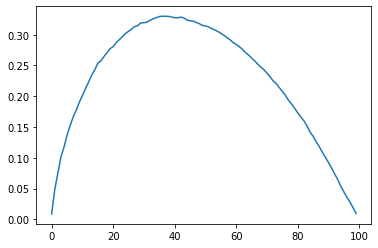

In [11]:
import matplotlib.pyplot as plt

verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

plt.plot(x, verjetnosti)
plt.show()